# Speech Understanding 
# Lecture 11: Packages and Games


### Mark Hasegawa-Johnson, KCGI, January 7, 2023

1. <a href="#section_1">Creating a python package</a>
1. <a href="#section_2">Adding functionality to your package</a>
1. <a href="#section_3">Using your package in a game</a>
1. <a href="#homework">Homework</a>


<a id='section_1'></a>

## 1. Creating a python package

A python **package** is like a **modules**.  If `mystuff` is a package or a module, you can load it using 

`import mystuff`

The difference is:

* A module can only be used if `mystuff.py` is in the same directory.

* A package is defined in advance, so that you can load it from any directory.

### How to create a package

Creating a package requires two files: 

1. the file `__init__.py` specifies the **content** of the package (the `__` is two underscore characters in a row).
1. the file `setup.py` specifies the **other details** of the package

In addition, we usually also have:

1. ... some other code files, for example `week9.py` and `week10.py`.

The file `setup.py` needs to be in the parent directory, and all other files in the childr directory, like this:

```
speech_package_parent_directory/
    ├── setup.py
    └── speech_package/
          ├── __init__.py
          ├── week9.py
          └── week10.py
```

### Create the `speech_package` folder

First, create a new folder, like this:

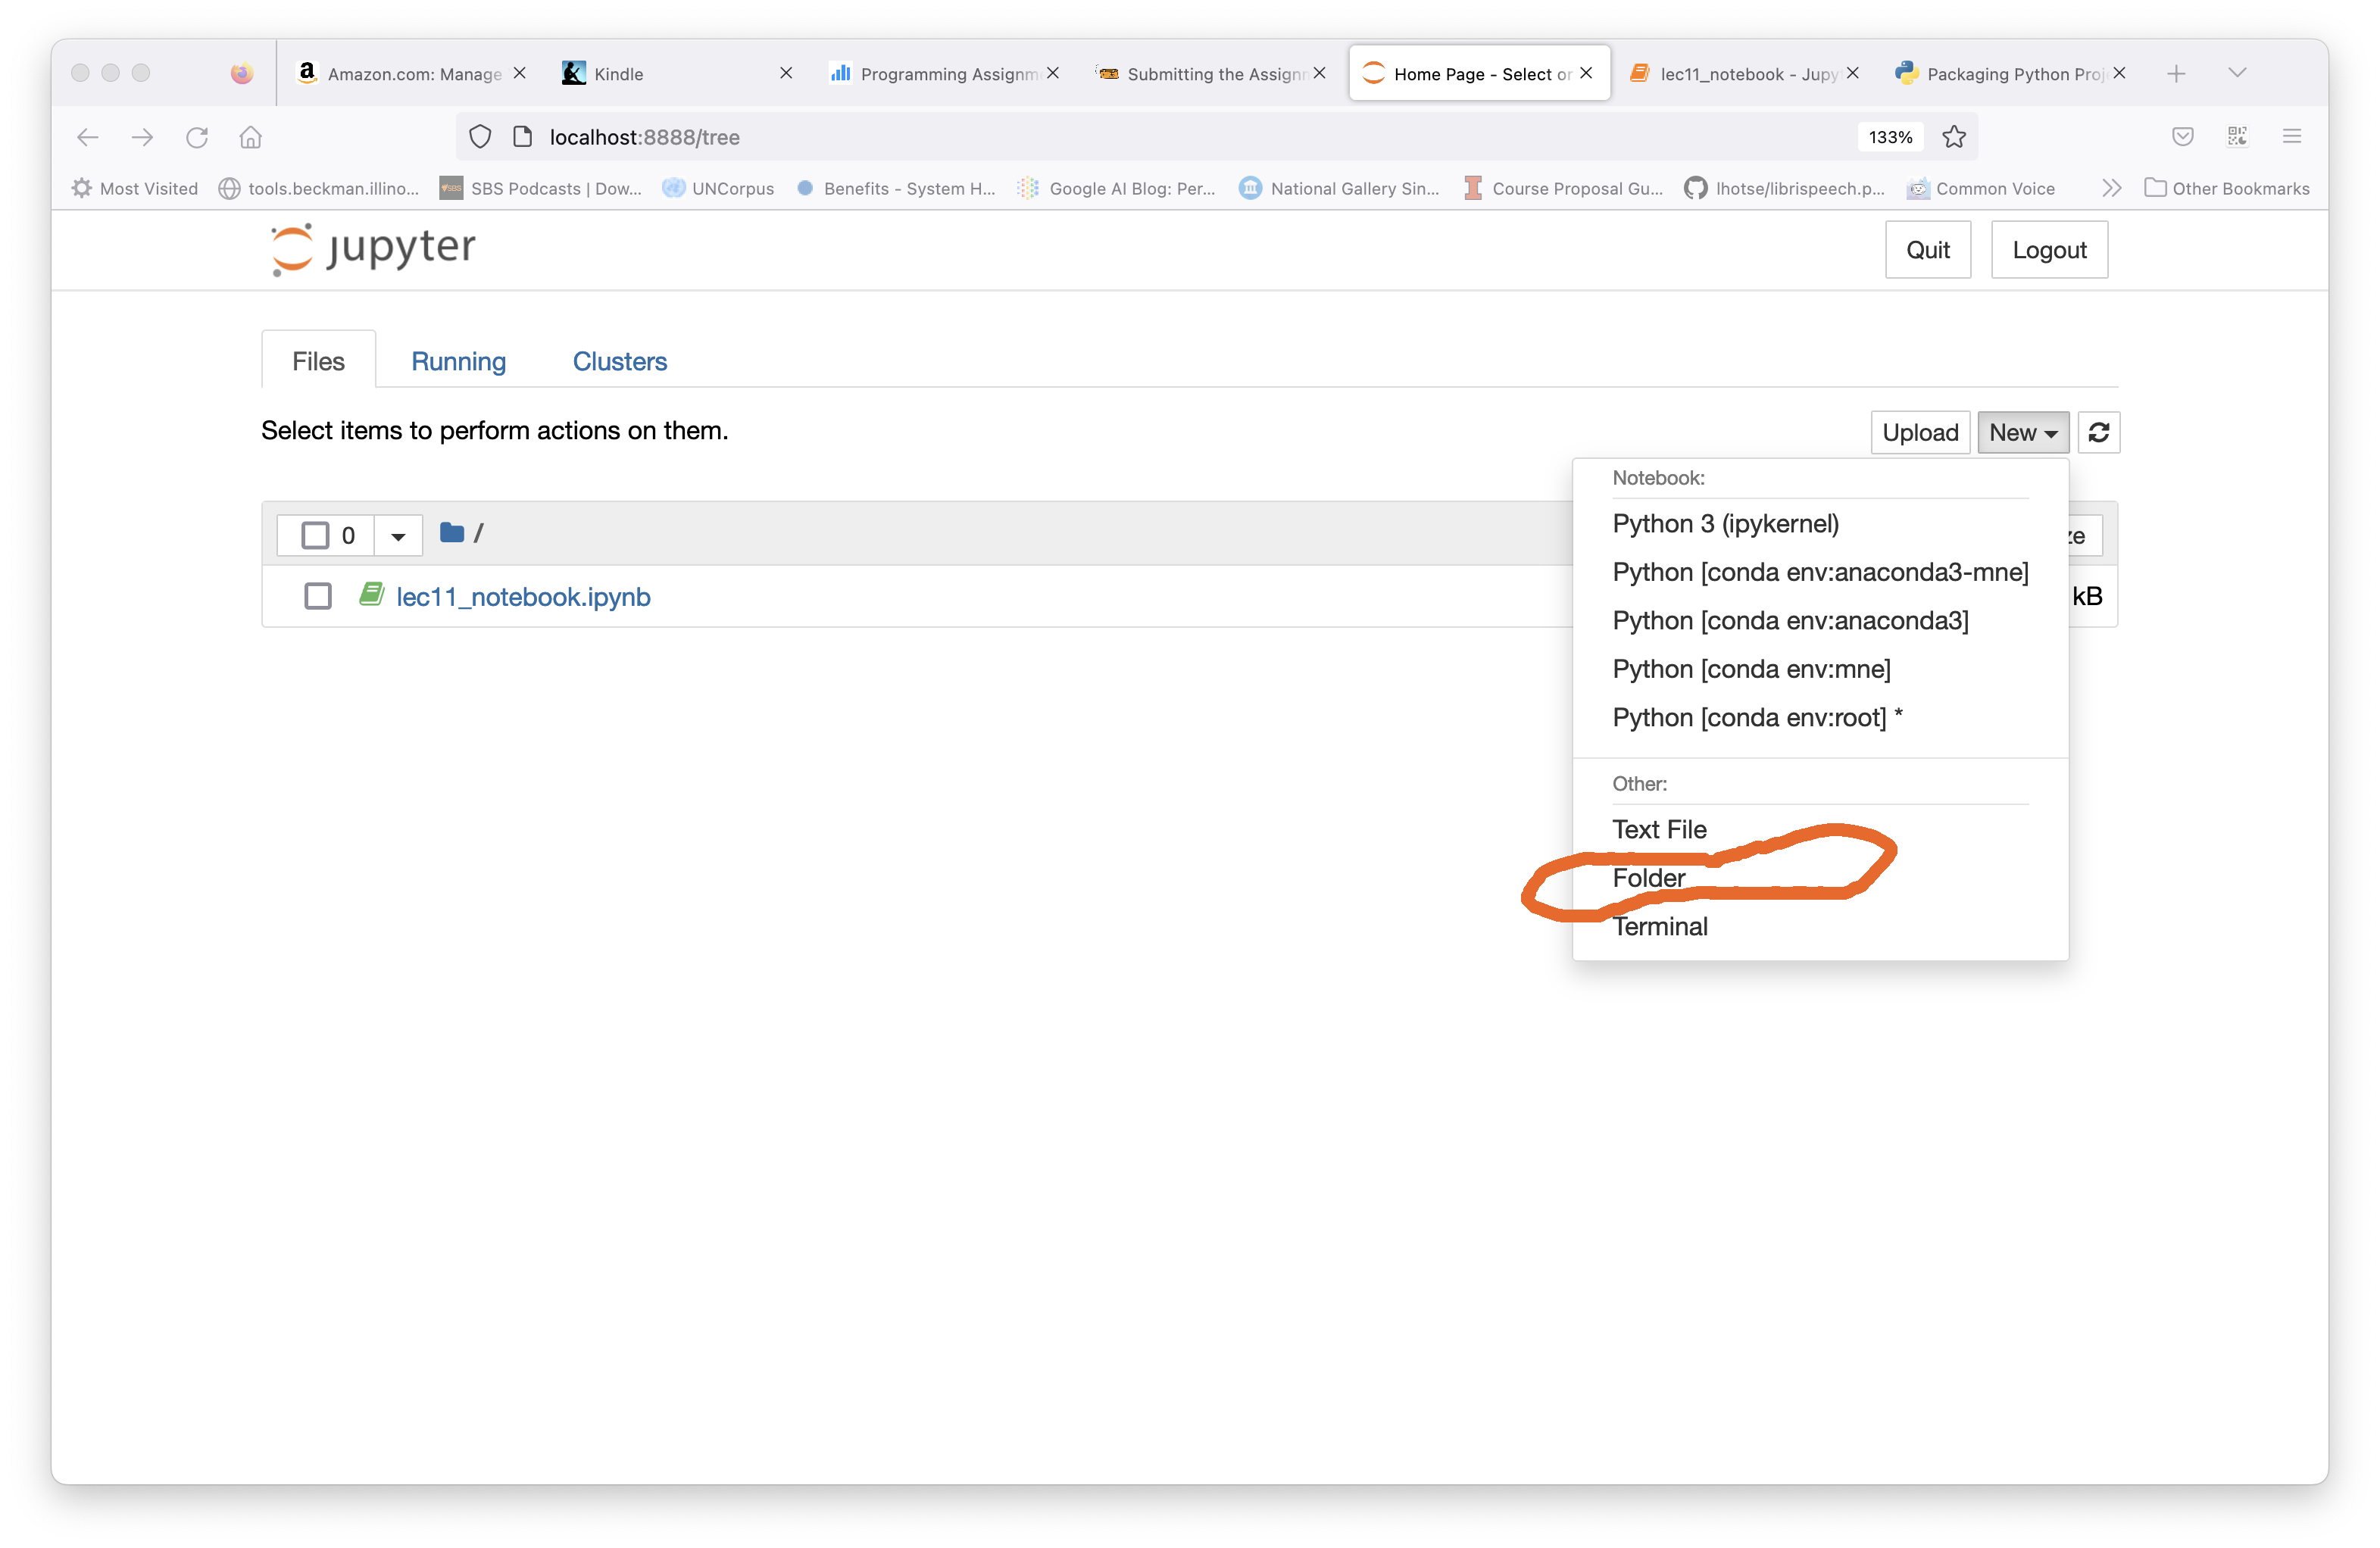


Second, select the box next to the folder name, like this, and then click `Rename`, and change its name to `speech_package`:

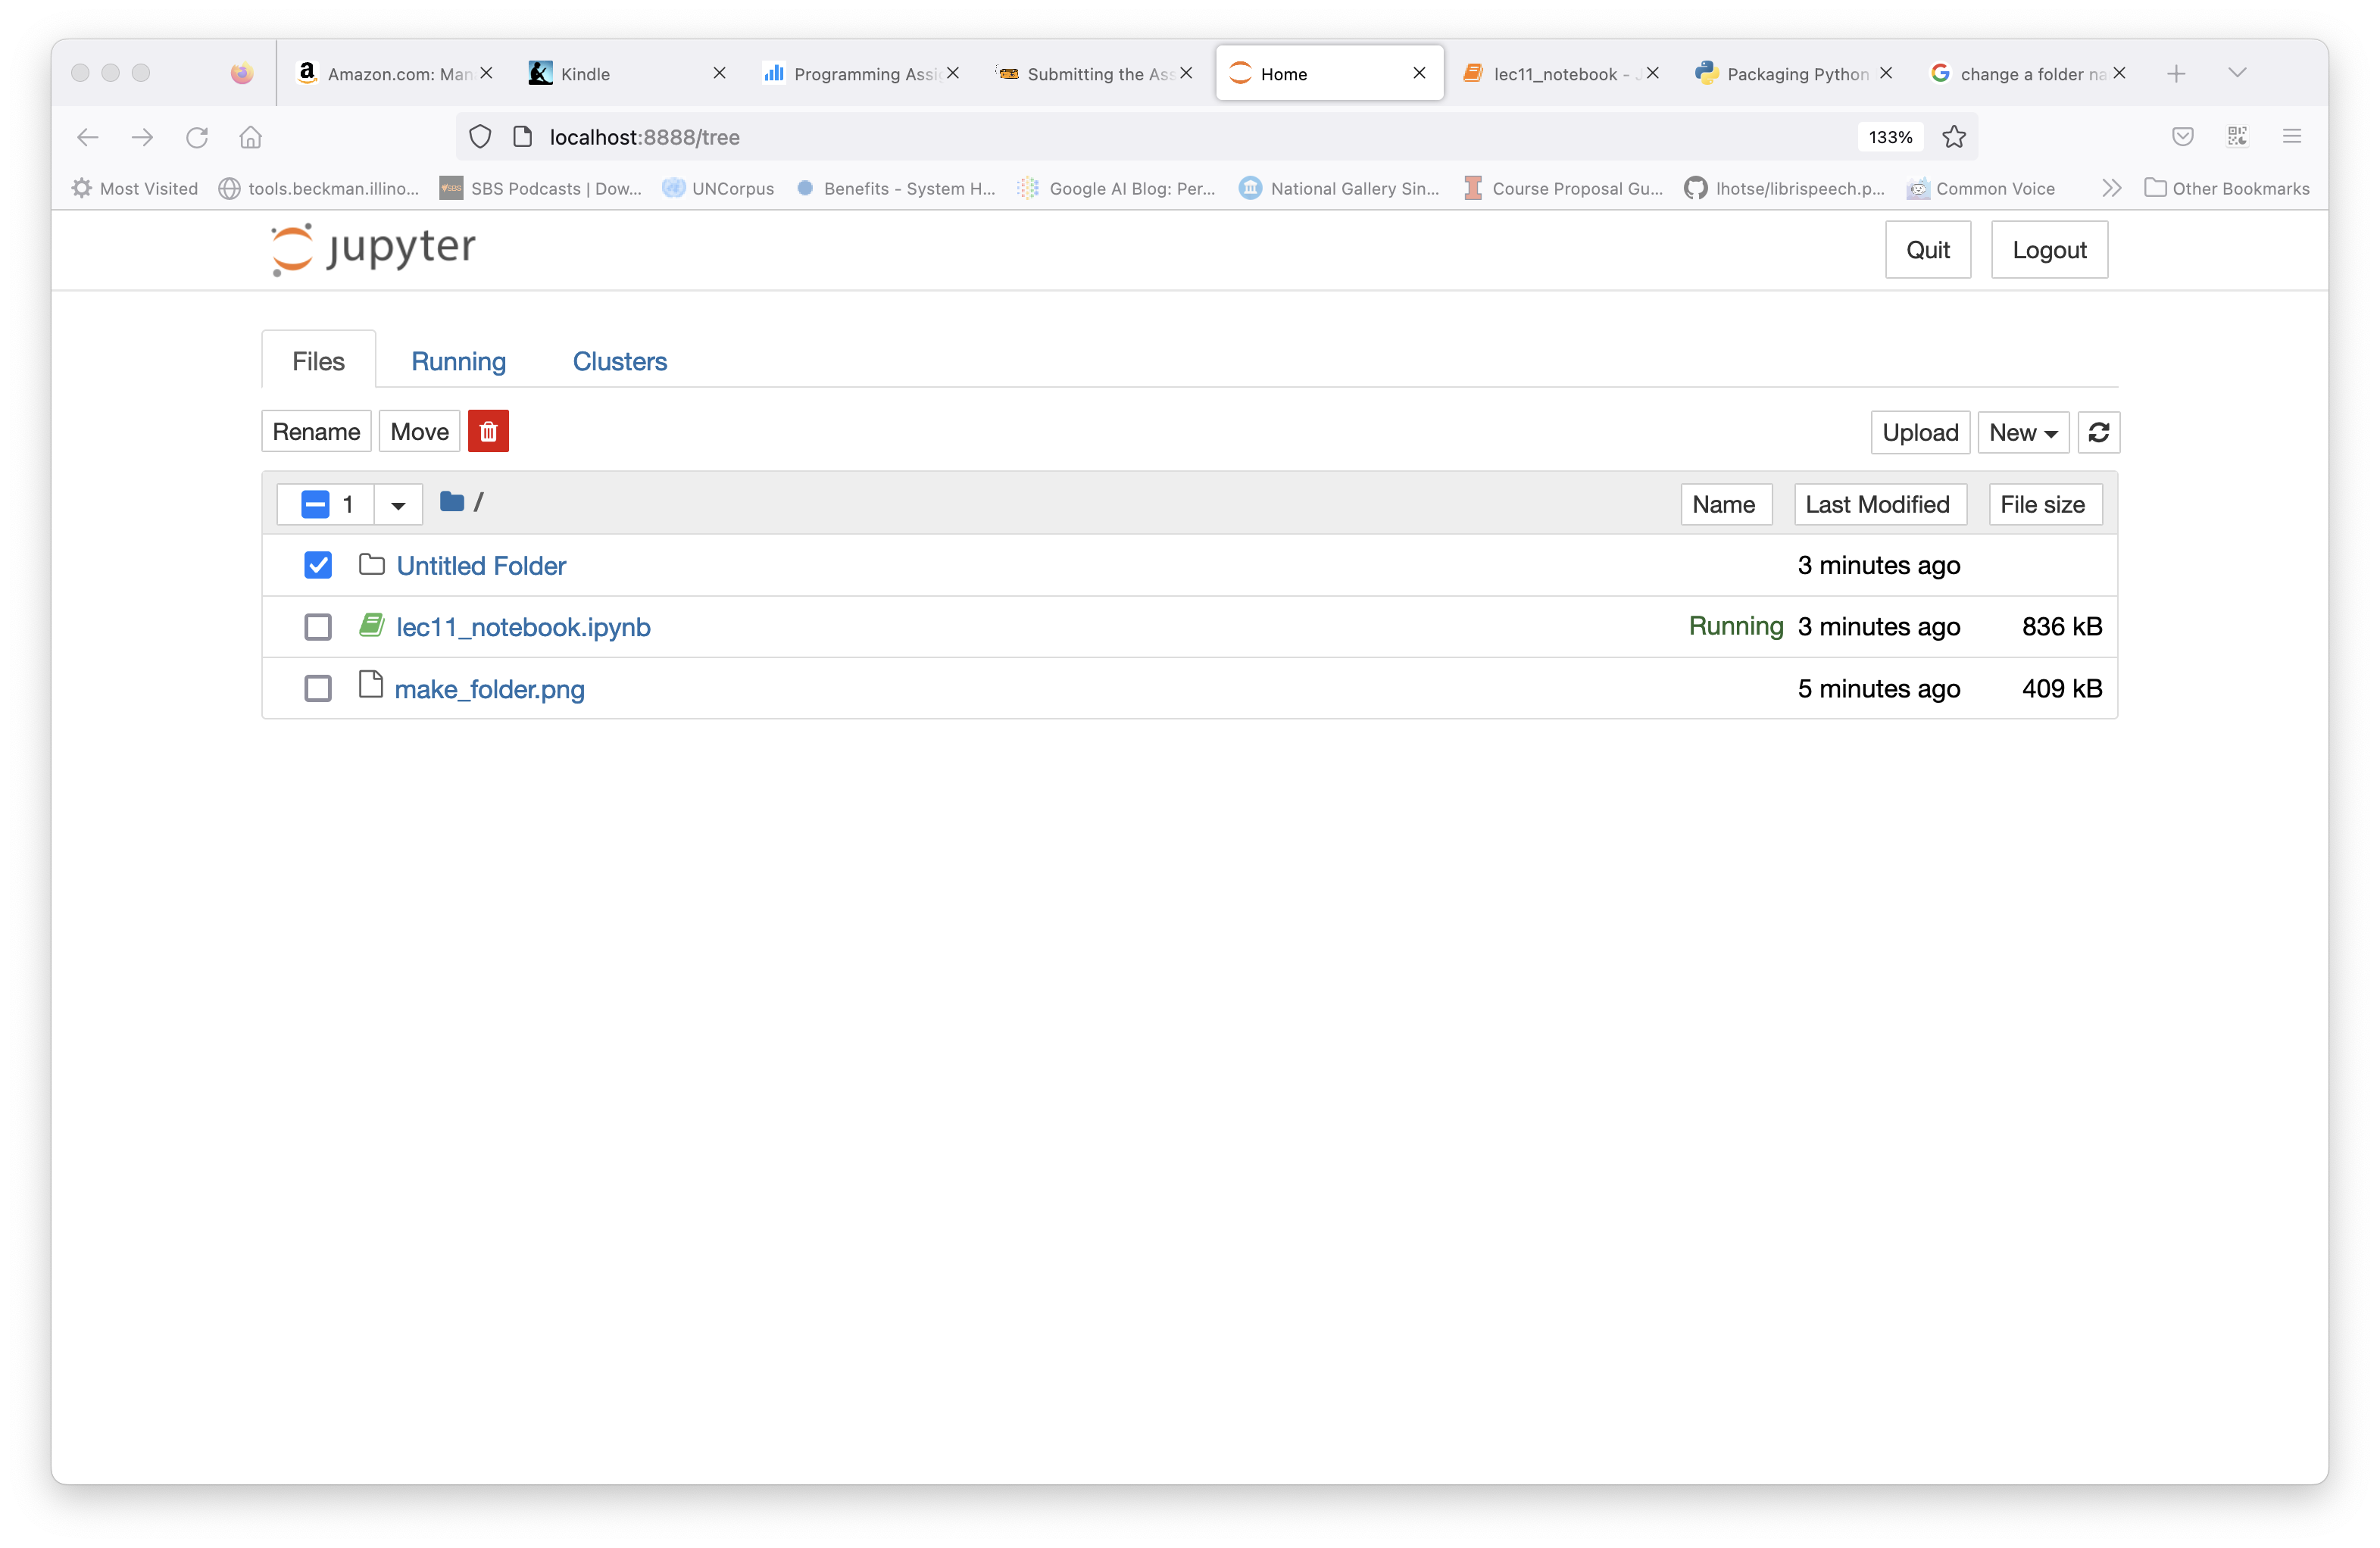

Use the file browser in your computer to copy your previous two homework files, `week9.py` and `week10.py`, into the new folder.

Now click on the new folder, and select `New -> Text File`, like this:

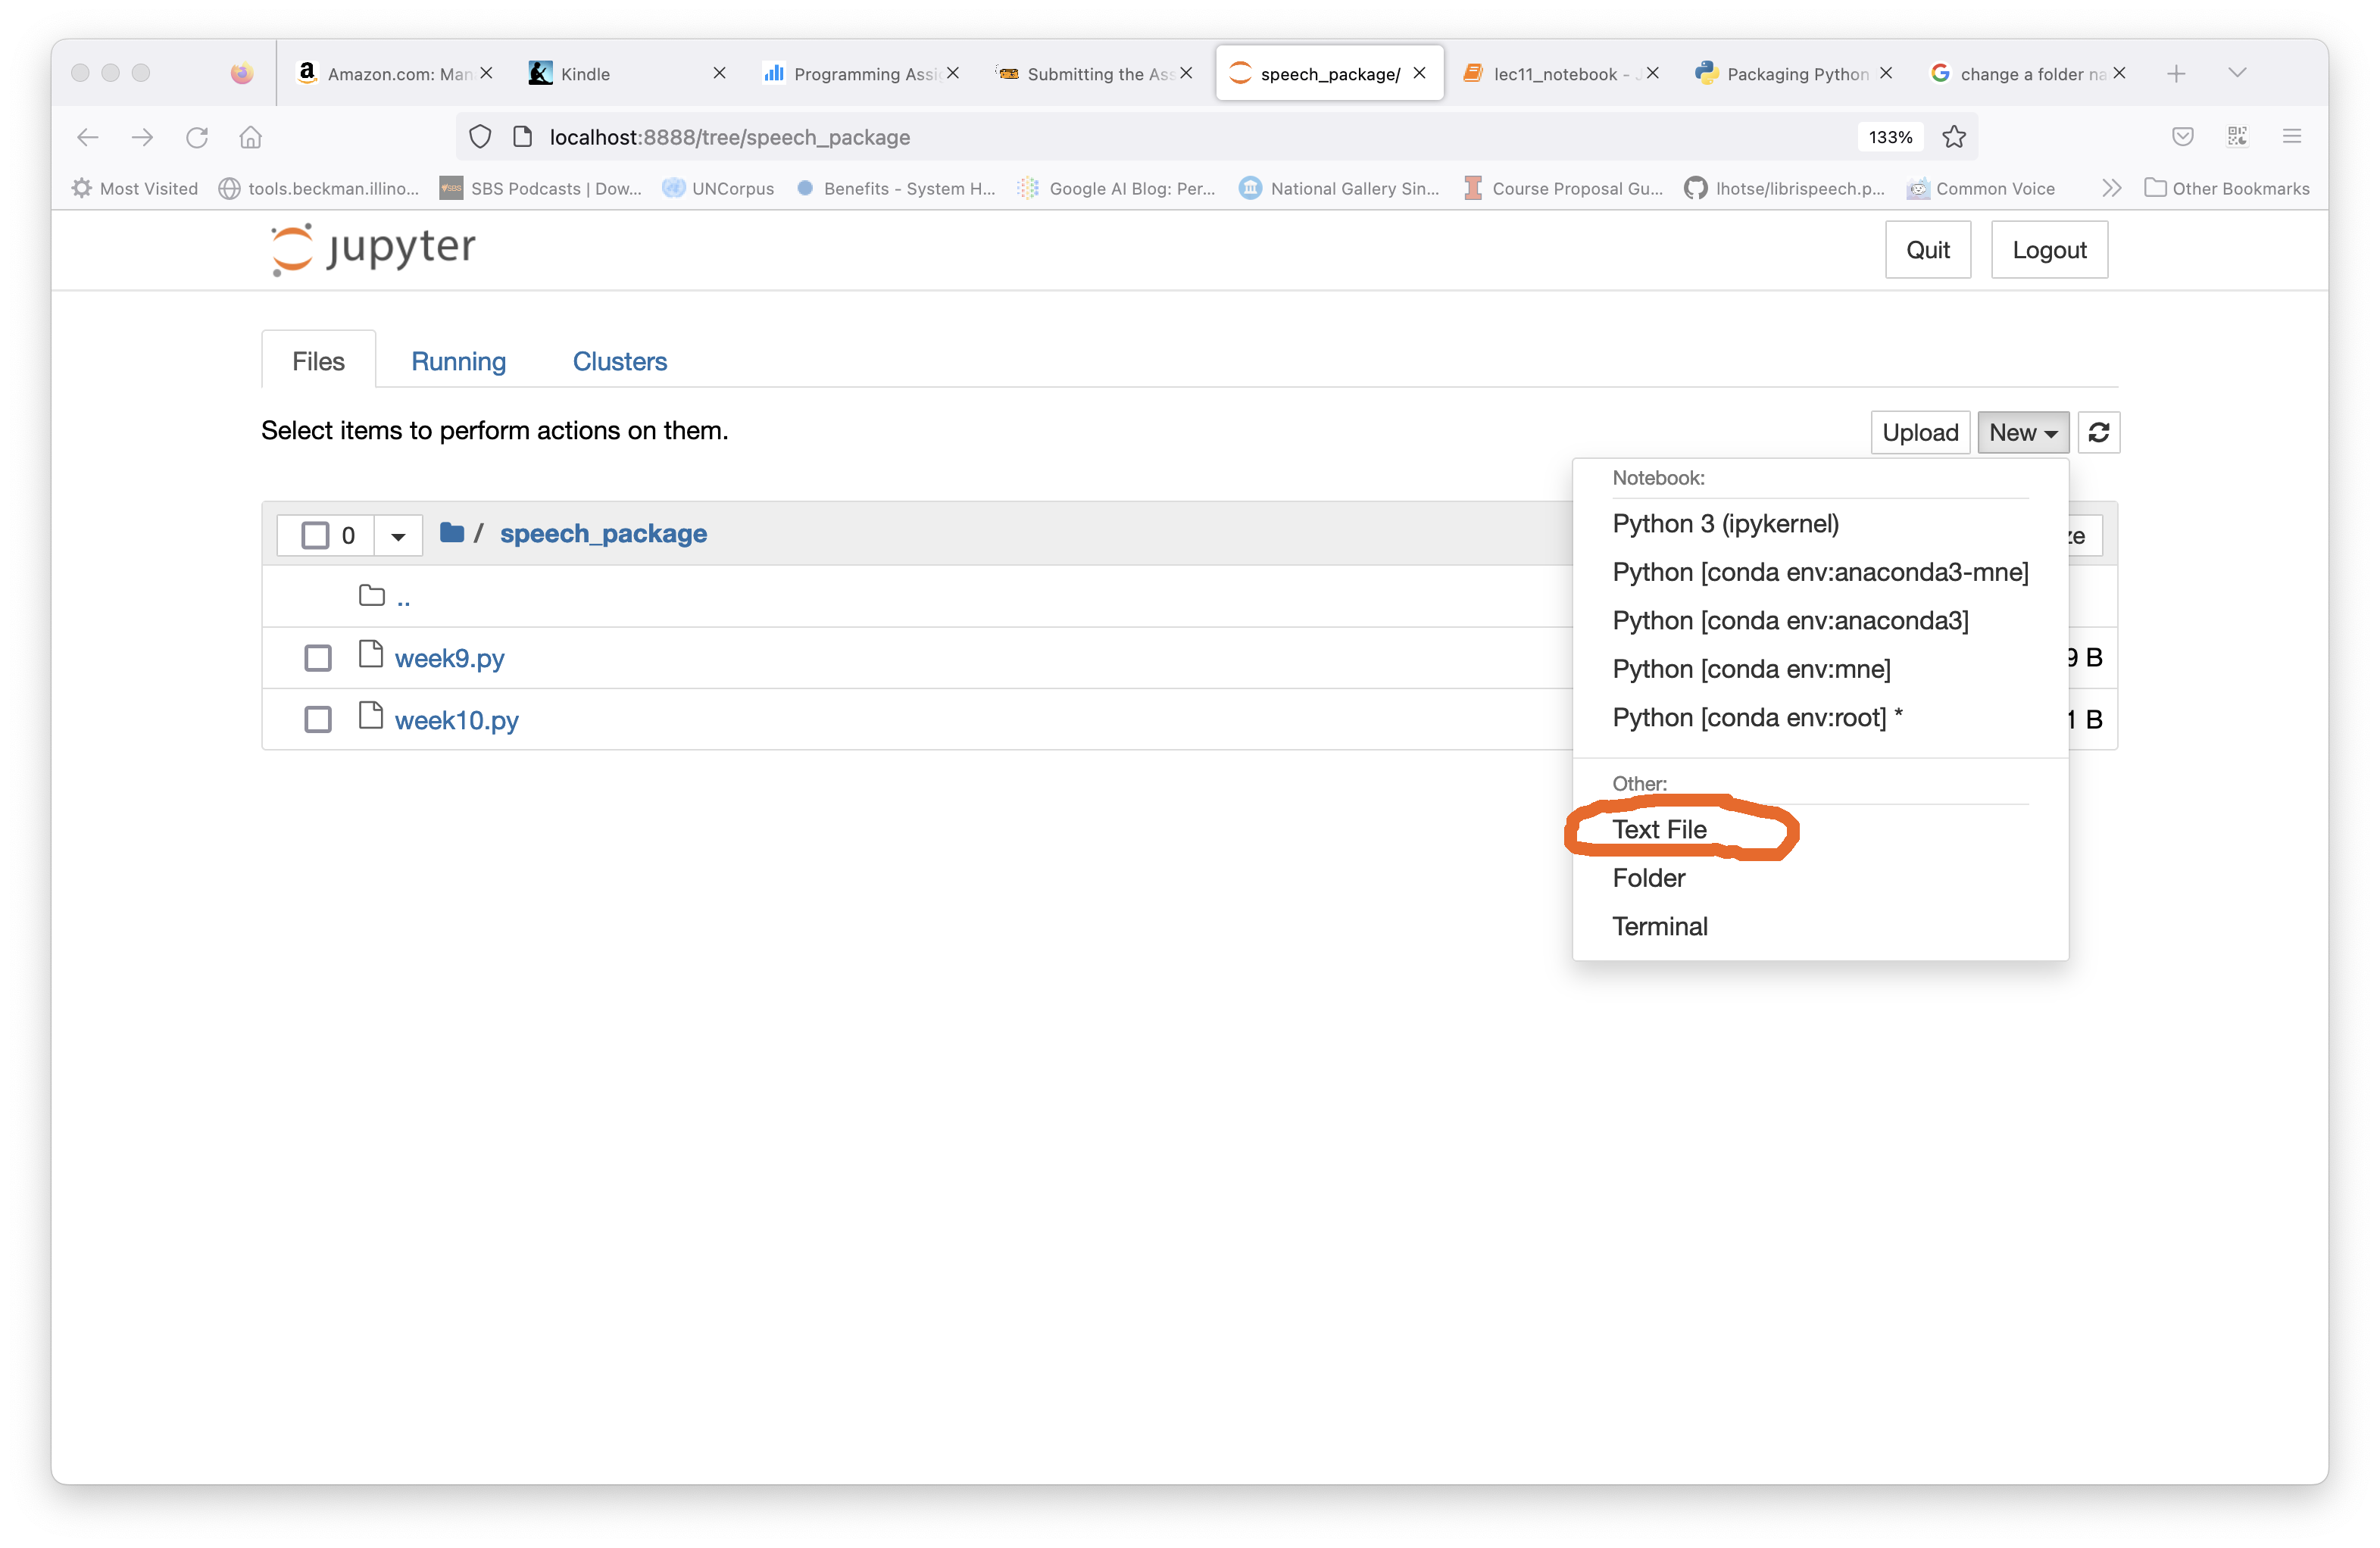

Change your text file's name to `__init__.py`, and then put the following content into it, and then choose `File -> Save` to save it:

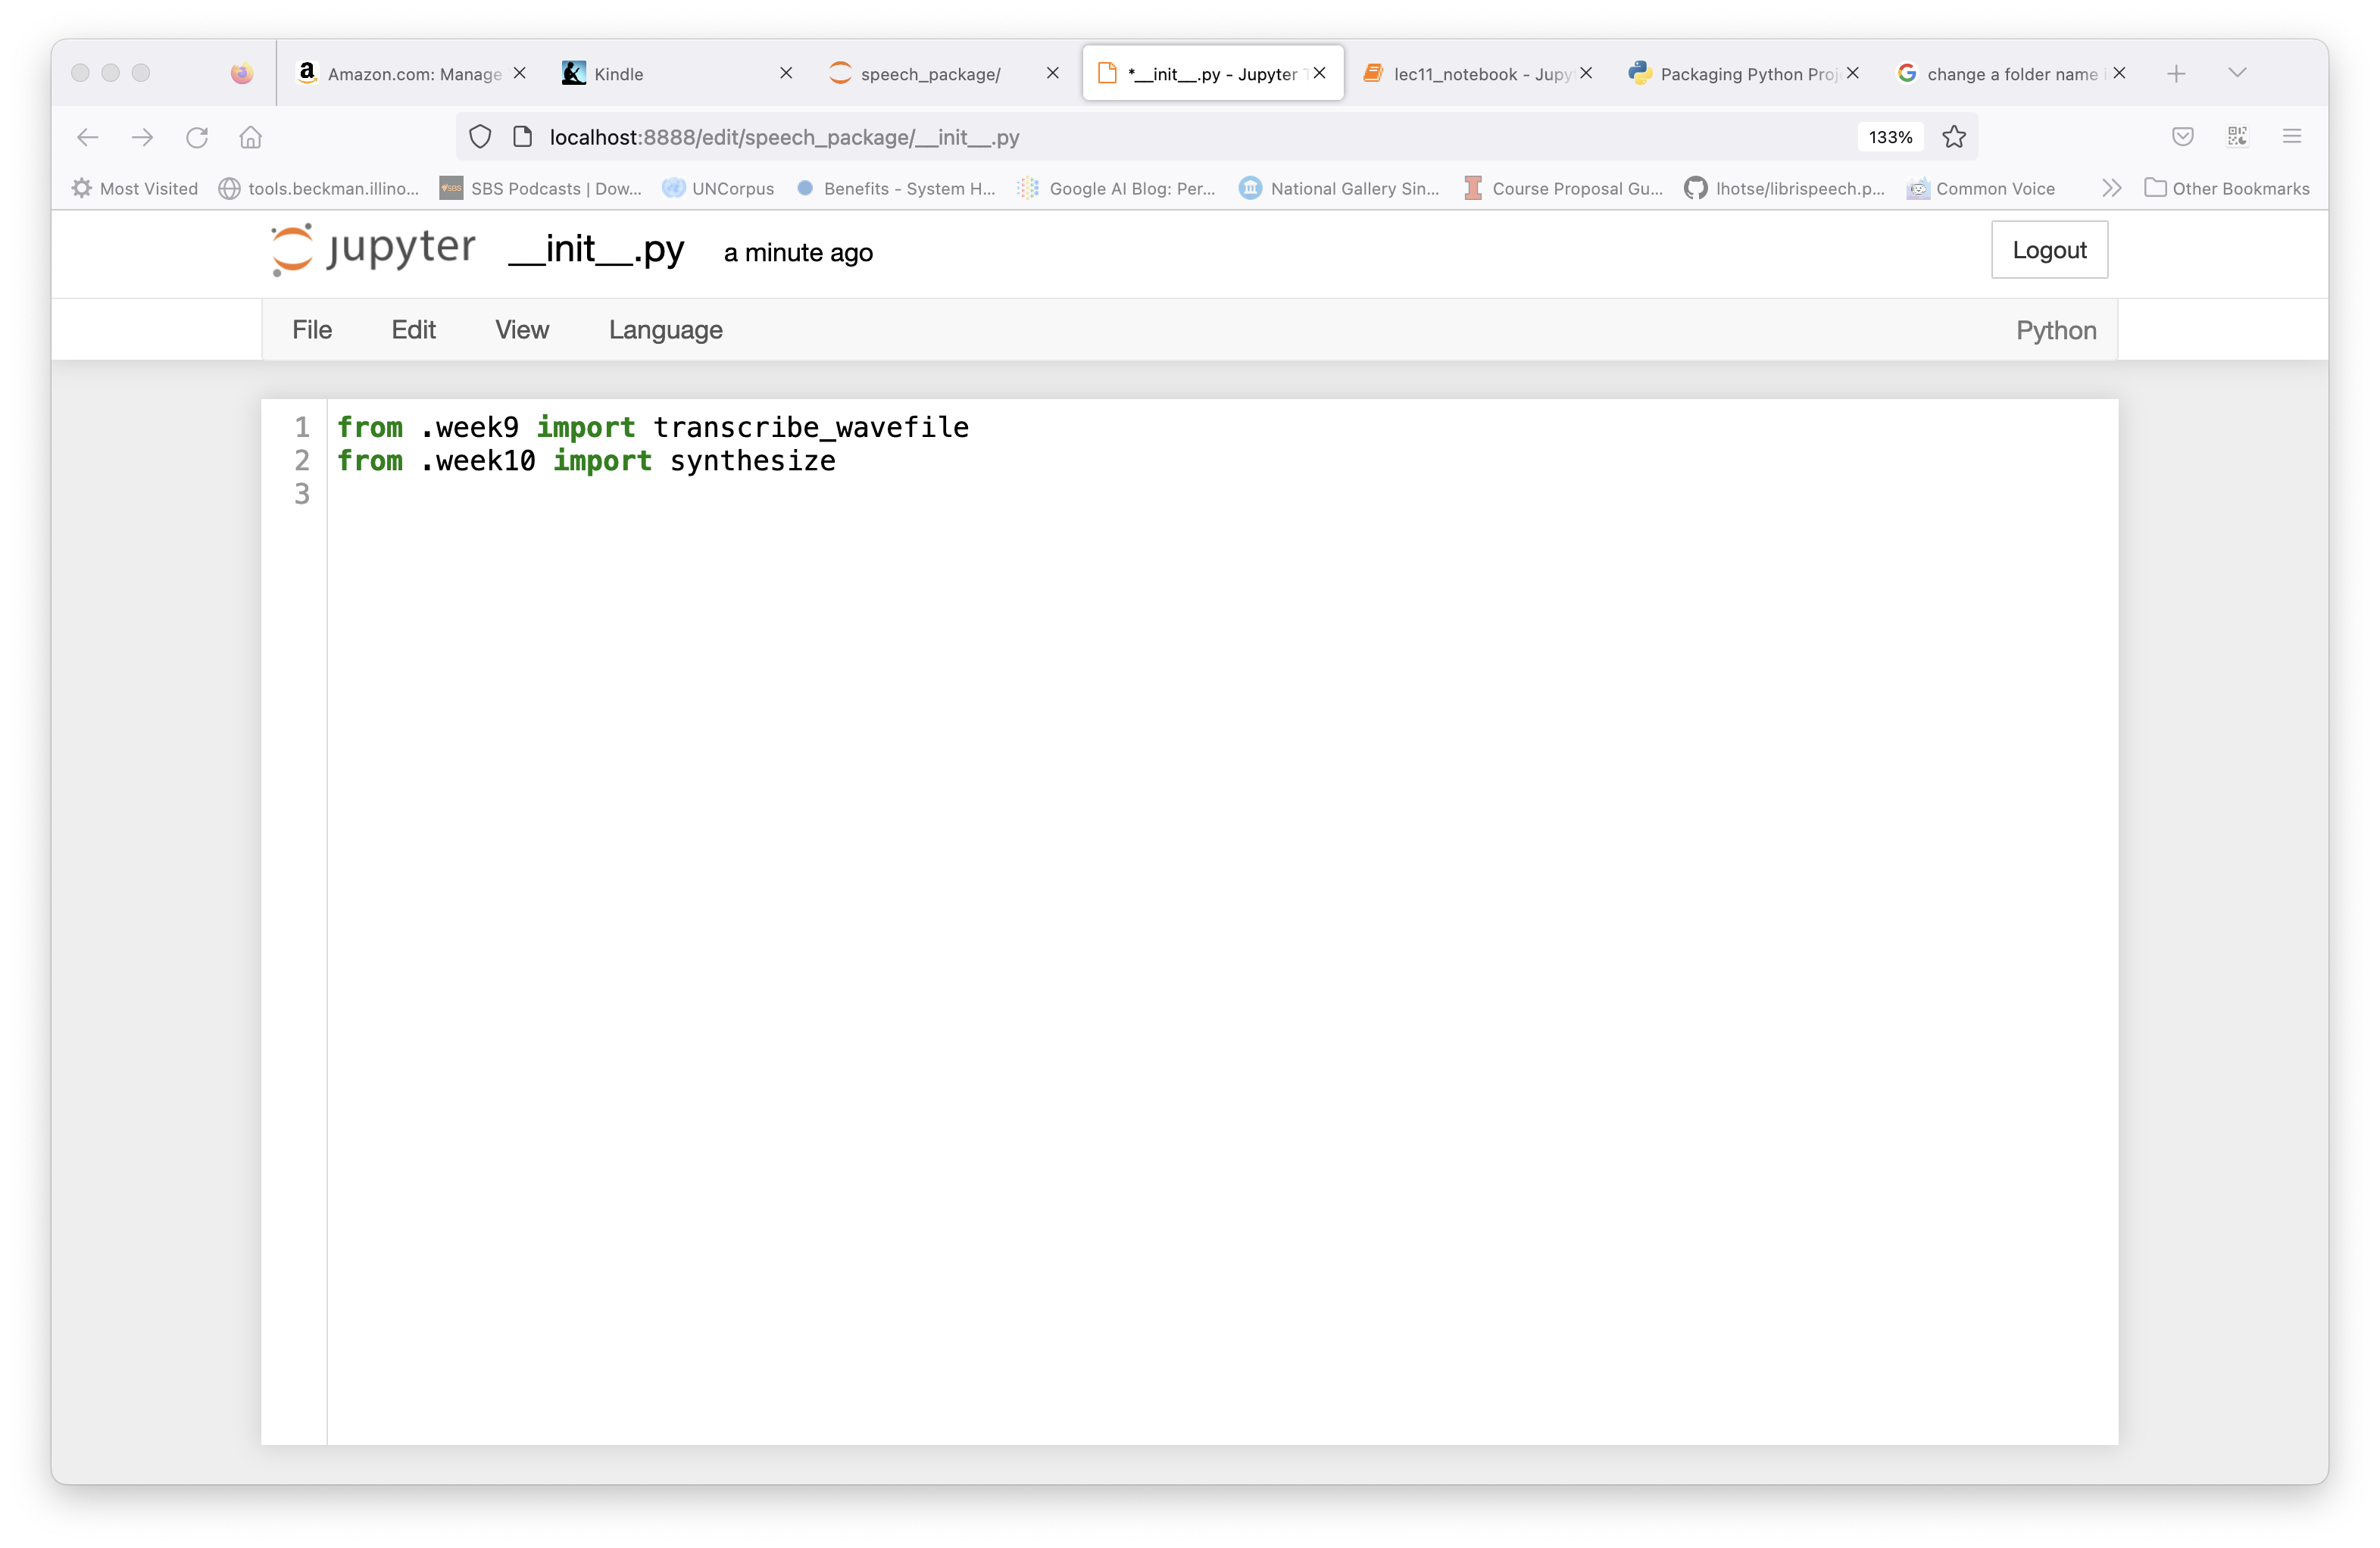

Go up to the parent directory, and create another text file:

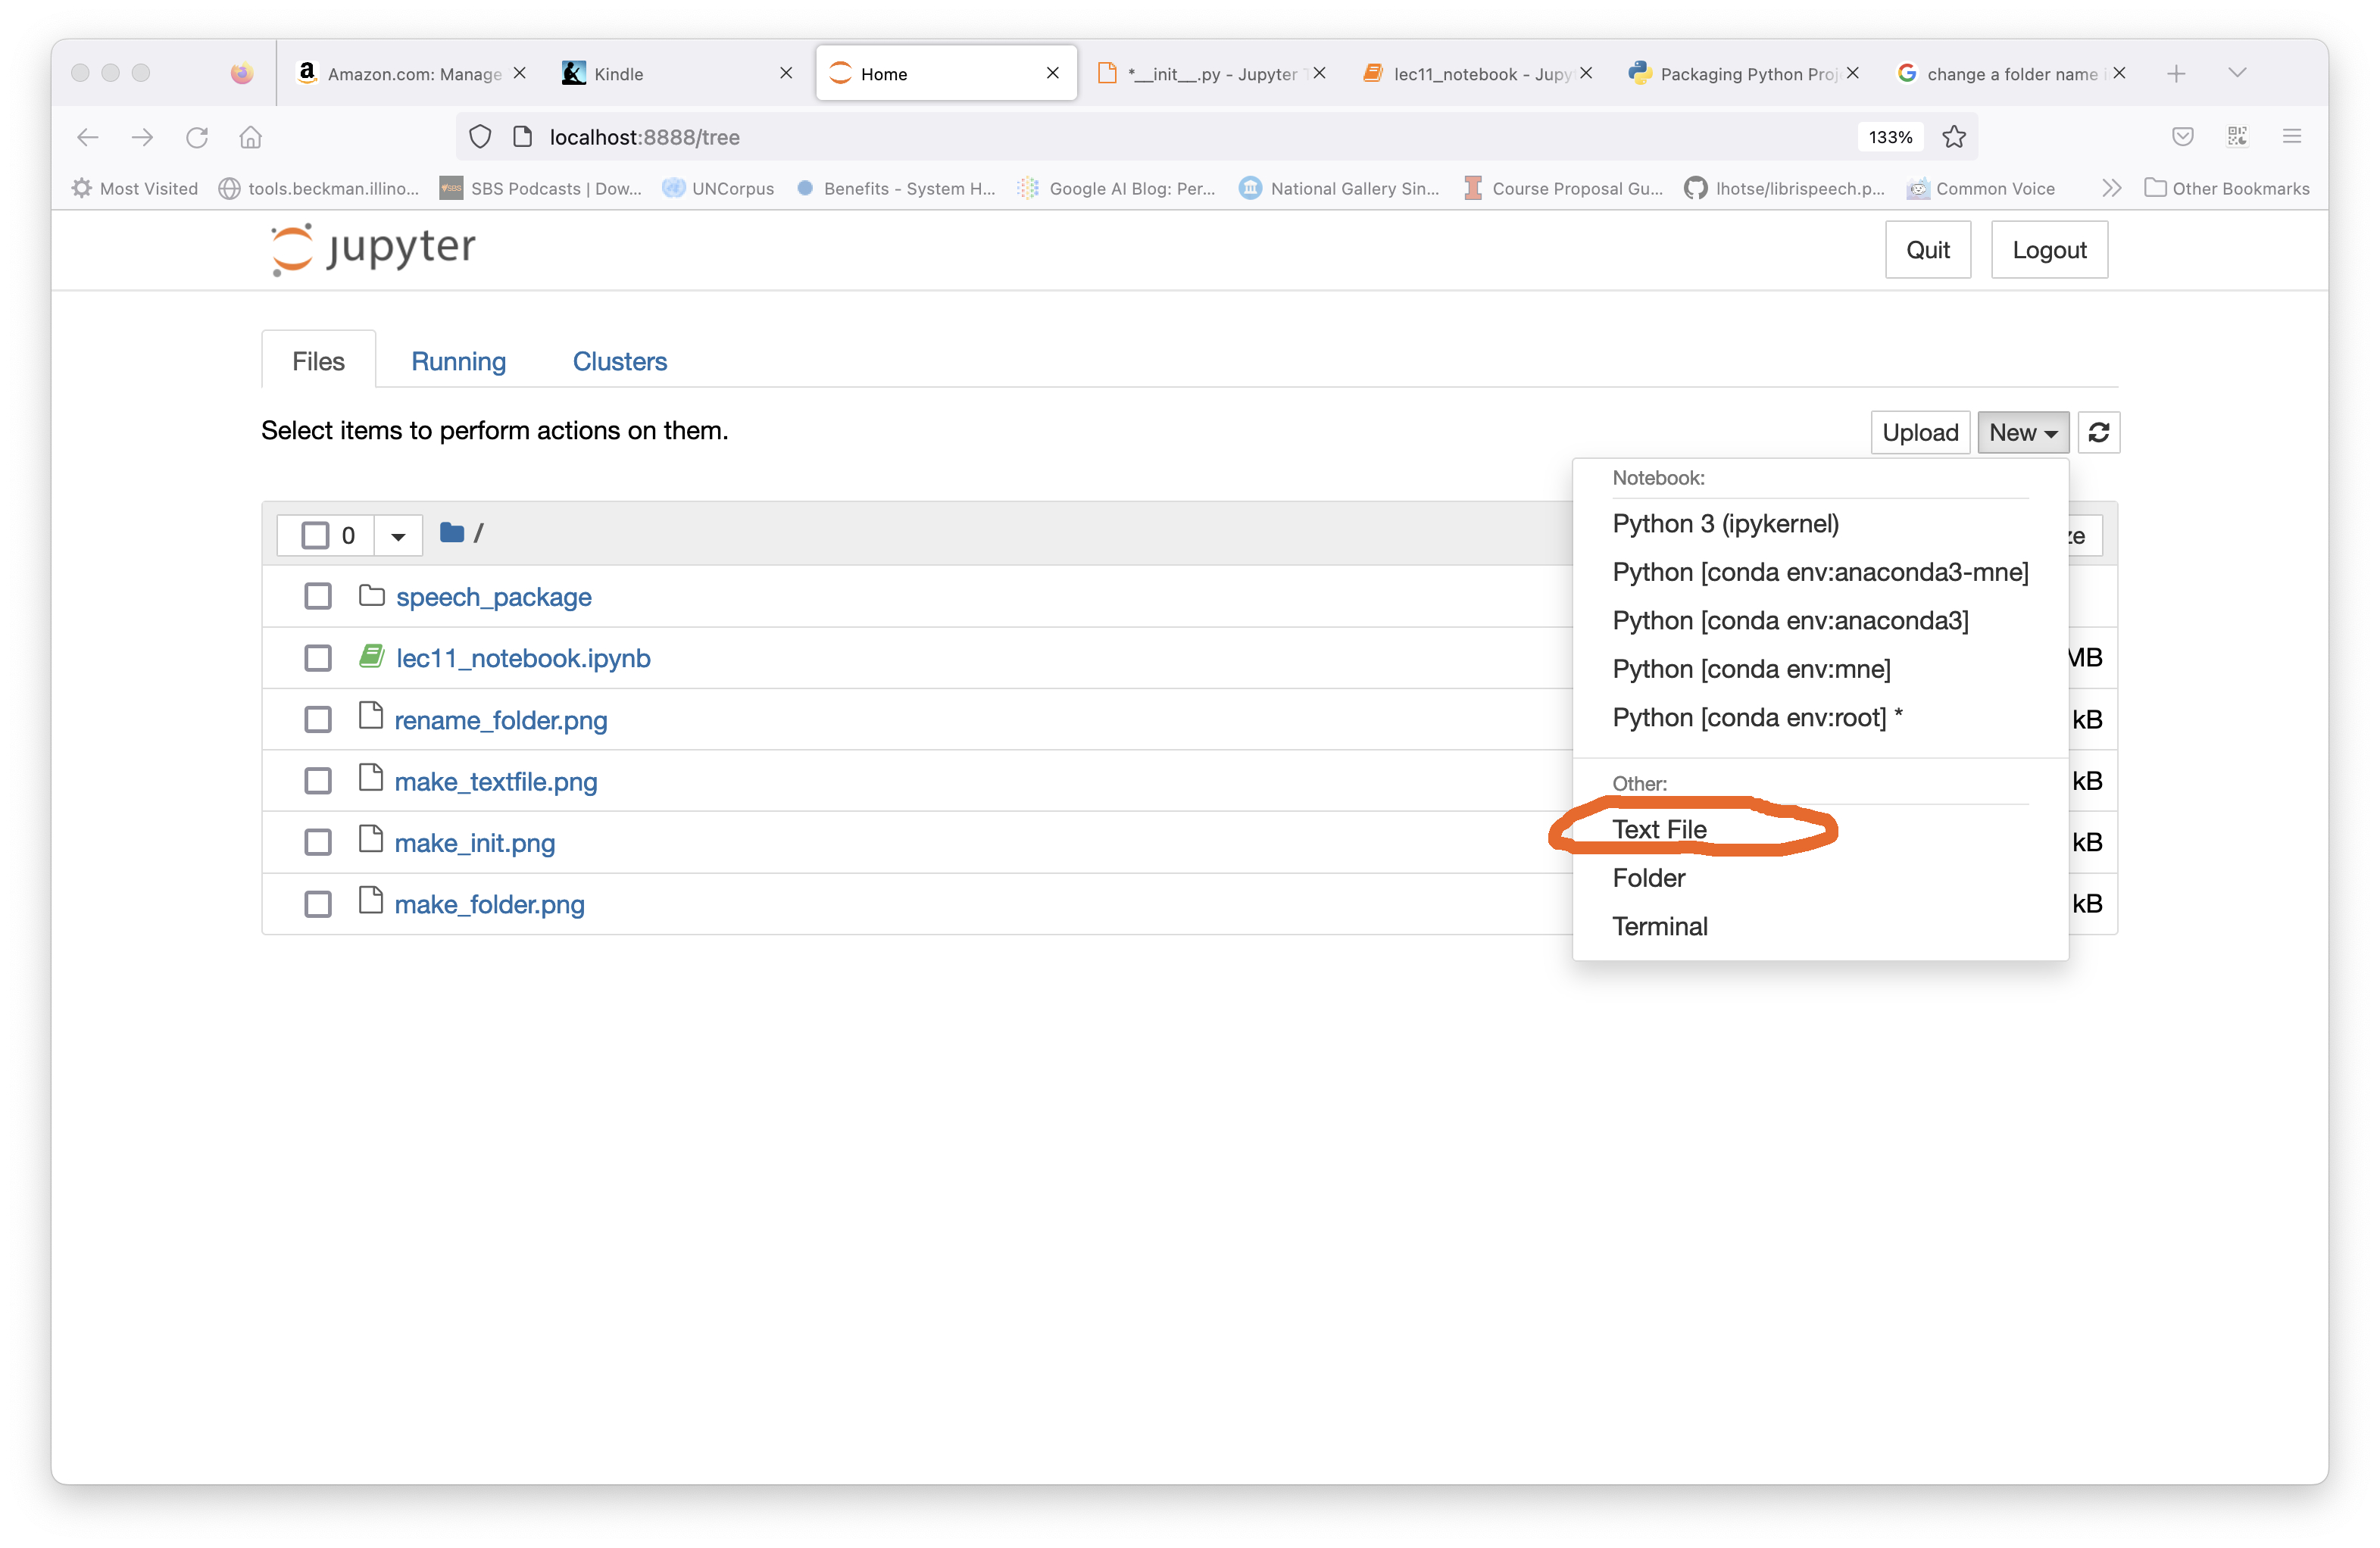

Change the filename to `setup.py`, and give it the following content (change `author` and `author_email` to show your name, and your email.  You can change `description` to any description you like, and you can even change `name` and `version` to anything you like).

After you've finished, choose `File -> Save` to save it.

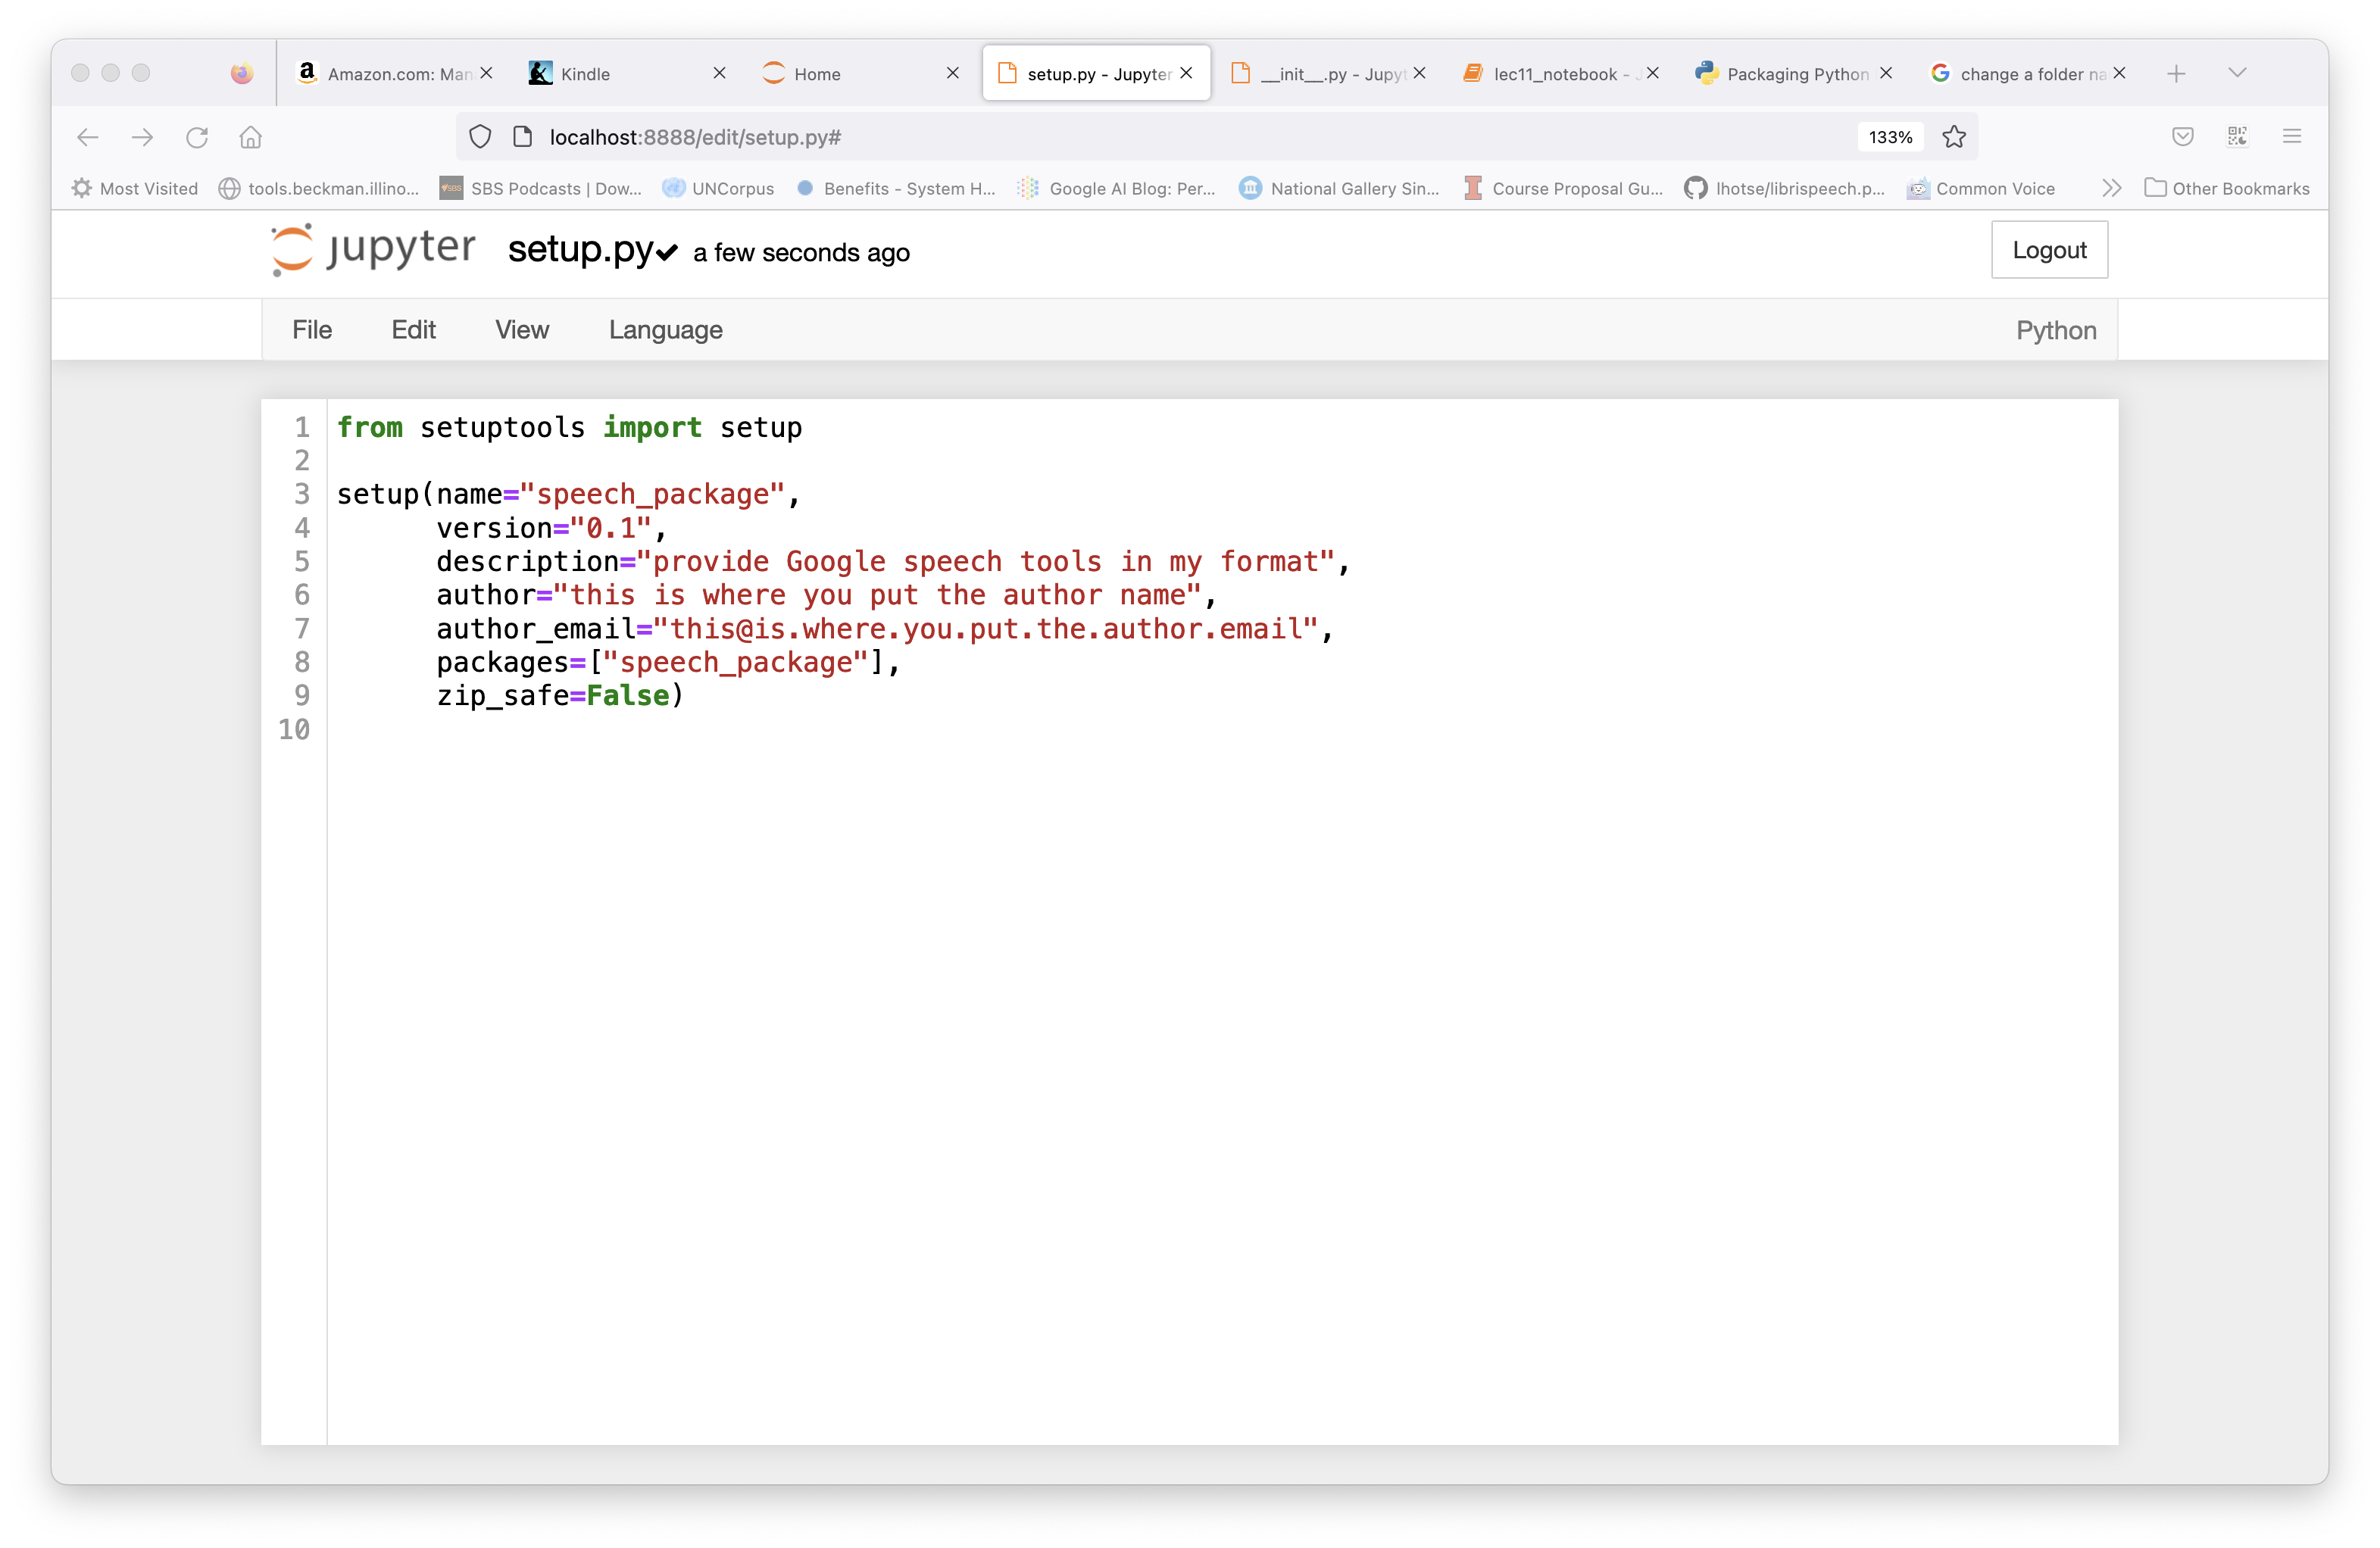

If the files are created as shown above, then you should be able to go to the parent directory (where the file `setup.py` is, and type the following command to create the new package:

In [1]:
!python setup.py install

running install
/Users/jhasegaw/opt/anaconda3/lib/python3.8/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/Users/jhasegaw/opt/anaconda3/lib/python3.8/site-packages/setuptools/command/easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
running bdist_egg
running egg_info
writing speech_package.egg-info/PKG-INFO
writing dependency_links to speech_package.egg-info/dependency_links.txt
writing top-level names to speech_package.egg-info/top_level.txt
reading manifest file 'speech_package.egg-info/SOURCES.txt'
writing manifest file 'speech_package.egg-info/SOURCES.txt'
installing library code to build/bdist.macosx-10.9-x86_64/egg
running install_lib
running build_py
creating build/bdist.macosx-10.9-x86_64/egg
creating build/bdist.macosx-10.9-x86_64/egg/speech_p

Now you should be able to import `speech_package` into any python code, anywhere on your computer:

In [2]:
import speech_package


... and you should be able to use its code, like this:

In [3]:
import speech_package
import librosa, IPython

speech_package.synthesize("this is a test","en","testfile.mp3")
x, fs = librosa.load("testfile.mp3")
IPython.display.Audio(data=x, rate=fs)

/Users/jhasegaw/opt/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


That's how you create a python package!

If you want to distribute your package, so other people can use it, here are instructions: https://packaging.python.org/en/latest/tutorials/packaging-projects/

<a id='section_2'></a>

## 2. Adding functionality to your package

The package now has just two methods:

* synthesize - create an mp3 file containing audio for some text
* transcribe_wavefile - recognize content of a wave file

We will also need the following functionality:

* recognize_microphone - recognize audio from a microphone

In the directory `speech_package`, create a `Text file` called `week11.py`.  Copy and paste, into it, the following content:

In [26]:
import speech_recognition as sr

def recognize_microphone():
    speech = sr.Recognizer()
    while True:
        print('Python is listening...')
        with sr.Microphone() as source:
            speech.adjust_for_ambient_noise(source)
            try:
                audio = speech.listen(source)
                inp = speech.recognize_google(audio)
                break
            except sr.UnknownValueError:
                continue
            except sr.RequestError:
                continue
            except sr.WaitTimeoutError:
                continue
    return inp

Now modify the file `__init__.py` so that it includes your new function.  It should look like this:

```
from .week9 import transcribe_wavefile
from .week10 import synthesize
from .week11 import recognize_microphone
```

Now save it (`File -> Save`), then go up to the parent directory, and change `setup.py` so it has the version number `0.2`.  Then run the following code again:

In [27]:
!pip install -e .

Obtaining file:///Users/jhasegaw/Dropbox/mark/teaching/kcgi/speech/lec/lec11
  Preparing metadata (setup.py) ... done
  Attempting uninstall: speech-package
    Found existing installation: speech-package 0.2
    Uninstalling speech-package-0.2:
      Successfully uninstalled speech-package-0.2
  Running setup.py develop for speech-package


Now let's try running the new function, to make sure it works:

In [28]:
import importlib
importlib.reload(speech_package)

response = speech_package.recognize_microphone()

print("You said",response)

Python is listening...
result2:
{   'alternative': [   {   'confidence': 0.98762906,
                           'transcript': 'testing testing'}],
    'final': True}
You said testing testing


<a id='section_3'></a>

## 3. Using your package in a game

Now let's use your speech package in a guessing game!

1. First, the computer asks you to think of a number
1. Then, the computer guesses the number
1. If the guess is correct, you say "correct!" and the game is over
1. If the guess is too high or too low, you say "too high" or "too low," and the computer continues guessing.

First, let's play the game without speech.

In [31]:
import time

print("Think of an integer between 1 and 9.")
time.sleep(5)

minimum_possible = 1
maximum_possible = 9

while True:
    guess = int(round((minimum_possible+maximum_possible)/2))
    print("Is "+str(guess)+" your number?")
    answer = input("Say 'too high', 'too small', or 'correct'")
    if answer=='correct':
        print("Hooray!")
        break
    elif answer=='too high':
        maximum_possible = guess-1
    elif answer=='too small':
        minimum_possible = guess+1
    else:
        print("I don't understand what",answer,"means")

Think of an integer between 1 and 9.
Is 5 your number?
Say 'too high', 'too small', or 'correct'too high
Is 2 your number?
Say 'too high', 'too small', or 'correct'too small
Is 4 your number?
Say 'too high', 'too small', or 'correct'correct
Hooray!


Now let's try it with speech.

In [32]:
import time
import speech_package

print("Think of an integer between 1 and 9.")
time.sleep(5)

minimum_possible = 1
maximum_possible = 9

while True:
    guess = int(round((minimum_possible+maximum_possible)/2))
    prompt = "Is "+str(guess)+" your number? Say 'too high', 'too small', or 'correct'"
    speech_package.synthesize(prompt,"en","prompt.mp3")
    !play prompt.mp3
    answer = speech_package.recognize_microphone()
    if answer=='correct':
        speech_package.synthesize("Hooray!","en","hooray.mp3")
        !play hooray.mp3
        break
    elif answer=='too high':
        maximum_possible = guess-1
    elif answer=='too small':
        minimum_possible = guess+1
    else:
        print("I don't understand what",answer,"means")

Think of an integer between 1 and 9.

prompt.mp3:

 File Size: 20.2k     Bit Rate: 32.0k
  Encoding: MPEG audio    
  Channels: 1 @ 16-bit   
Samplerate: 24000Hz      
Replaygain: off         
  Duration: 00:00:05.04  

In:99.5% 00:00:05.02 [00:00:00.02] Out:221k  [      |      ]        Clip:0    
Done.
Python is listening...
result2:
{   'alternative': [   {'confidence': 0.7929877, 'transcript': 'too high'},
                       {'transcript': '2 High'},
                       {'transcript': 'to high'},
                       {'transcript': 'two High'},
                       {'transcript': 'Tu Hai'}],
    'final': True}

prompt.mp3:

 File Size: 19.8k     Bit Rate: 32.0k
  Encoding: MPEG audio    
  Channels: 1 @ 16-bit   
Samplerate: 24000Hz      
Replaygain: off         
  Duration: 00:00:04.94  

In:99.5% 00:00:04.92 [00:00:00.02] Out:217k  [      |      ] Hd:5.1 Clip:0    
Done.
Python is listening...
result2:
{   'alternative': [   {'confidence': 0.72705925, 'transcript': 'too

<a id='homework'></a>

## Homework for Week 11

Create the following three files, as shown above:

* `week11.py`
* `__init__.py`
* `setup.py`

Upload all three files to Gradescope.  Don't worry about the directory structure, just upload the files.  Gradescope will arrange them into a directory, and try to run `pip install -e .`.  If it works, you will get full points; if not, there will be an error.